In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.manifold import TSNE

help(TSNE)

Help on class TSNE in module sklearn.manifold.t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5)
 |  
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a rea

In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)

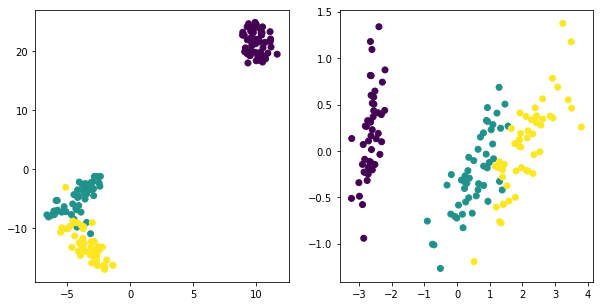

In [4]:
# t-SNE can help us to decide whether classes are separable in some linear or nonlinear representation. Here we can see that the 3 classes of the Iris dataset can be separated quite easily. They can even be separated linearly which we can conclude from the low-dimensional embedding of the PCA.

figure(figsize=(10, 5))
subplot(121)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
subplot(122)
scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset="train", categories=categories)
vectors = TfidfVectorizer().fit_transform(newsgroups.data)

In [ ]:
print(repr(vectors))

<2034x34118 sparse matrix of type '<class 'numpy.float64'>'
	with 323433 stored elements in Compressed Sparse Row format>


In [ ]:
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

In [ ]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2034 samples in 0.006s...
[t-SNE] Computed neighbors for 2034 samples in 1.073s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2034
[t-SNE] Computed conditional probabilities for sample 2000 / 2034
[t-SNE] Computed conditional probabilities for sample 2034 / 2034
[t-SNE] Mean sigma: 0.107856
[t-SNE] Computed conditional probabilities in 0.140s
[t-SNE] Iteration 50: error = 74.1851120, gradient norm = 0.1021041 (50 iterations in 1.855s)
[t-SNE] Iteration 100: error = 73.8206406, gradient norm = 0.0790983 (50 iterations in 1.723s)
[t-SNE] Iteration 150: error = 73.6116943, gradient norm = 0.1054806 (50 iterations in 1.225s)
[t-SNE] Iteration 200: error = 73.8133545, gradient norm = 0.0928886 (50 iterations in 1.196s)
[t-SNE] Iteration 250: error = 73.9367142, gradient norm = 0.1012889 (50 iterations in 0.914s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.936714
[t-SNE] Iteration 300: err

In [ ]:
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=newsgroups.target, marker="x")

In [ ]:
from sklearn.datasets import fetch_mldata

# Load MNIST dataset
mnist = fetch_mldata("MNIST original")
X, y = mnist.data / 255.0, mnist.target

# Create subset and reduce to first 50 dimensions
indices = arange(X.shape[0])
random.shuffle(indices)
n_train_samples = 5000
X_pca = PCA(n_components=50).fit_transform(X)
X_train = X_pca[indices[:n_train_samples]]
y_train = y[indices[:n_train_samples]]

In [ ]:
# Plotting function
matplotlib.rc('font', **{'family' : 'sans-serif',
                         'weight' : 'bold',
                         'size'   : 18})
matplotlib.rc('text', **{'usetex' : True})

def plot_mnist(X, y, X_embedded, name, min_dist=10.0):
    fig = figure(figsize=(10, 10))
    ax = axes(frameon=False)
    title("\\textbf{MNIST dataset} -- Two-dimensional "
          "embedding of 70,000 handwritten digits with %s" % name)
    setp(ax, xticks=(), yticks=())
    subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    scatter(X_embedded[:, 0], X_embedded[:, 1],
            c=y, marker="x")

    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = arange(X_embedded.shape[0])
        random.shuffle(indices)
        for i in indices[:5000]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28, 28),
                                      cmap=cm.gray_r), X_embedded[i])
            ax.add_artist(imagebox)

In [ ]:
X_train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_train)

In [ ]:
plot_mnist(X[indices[:n_train_samples]], y_train, X_train_embedded,
           "t-SNE", min_dist=20.0)